<a href="https://colab.research.google.com/github/megan-r-brown/Exploring-the-role-of-Materials-Chemistry-Biology-and-Electronics-in-Smartphones/blob/Waves-and-Color/Waves_and_Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown
#!pip install matplotlib ipywidgets
#!pip install ipympl
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, HBox
from matplotlib.patches import Rectangle


def plot_sine_wave(L, ax=None):
    x = np.linspace(0, L, 100)  # Define x range
    y_1 = np.sqrt(2/L) * np.sin(1 * np.pi * x / L)
    y_2 = np.sqrt(2/L) * np.sin(2 * np.pi * x / L)

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y_1, label="n = 1", color='red')
    ax.plot(x, y_2, label="n = 2", color='blue')
    ax.axhline(y=0, color='grey', linestyle='--', linewidth=0.5)  # Add light grey dotted line at y=0
    ax.set_ylim(-1, 1)  # Set y-axis limits
    ax.set_xlim(0, L)  # Set x-axis limits

    ax.set_title('Wave Function of n = 1 & 2')
    ax.set_xlabel('L')
    #ax.set_ylabel('y')
    ax.legend()

def plot_lines(y1, y2, x_position=0.5, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))  # Increase the size of the plot

    ax.axhline(y=y1, color='blue', linestyle='-', linewidth=2, label='n = 2')
    ax.axhline(y=y2, color='red', linestyle='-', linewidth=2, label='n = 1')

    # Draw vertical line between y1 and y2 at x_position
    ax.plot([x_position, x_position], [y1, y2], color='green', linestyle='--', linewidth=2)

    difference = abs(y1 - y2)
    mid_y = (y1 + y2) / 2
    text_x_position = x_position + .001
    ax.text(text_x_position, mid_y, f'{difference:.2f} eV', color='green', va='center', ha='left')

    # Hide x-axis
    #ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax.set_ylim(0, 5)
    ax.set_ylabel('eV')
    ax.set_title('Energies')
    ax.legend()

"https://gist.github.com/friendly/67a7df339aa999e2bcfcfec88311abfc"
def wavelength_to_rgb(wavelength, gamma=0.8):
    if 380 <= wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif 440 < wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif 490 < wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif 510 < wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif 580 < wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif 645 < wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 1.0
        G = 1.0
        B = 1.0
        print("Your Color Is Outside The Visible Light Spectrum")

    R = int(R * 255)
    G = int(G * 255)
    B = int(B * 255)

    return (R, G, B)


def display_color(rgb_color):
    fig, ax = plt.subplots()
    ax.add_patch(Rectangle((0, 0), 1, 1, color=[c/255 for c in rgb_color]))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.show()


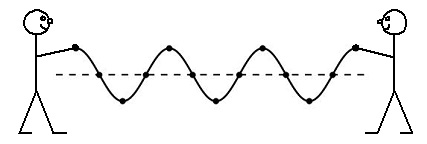

---
[Link to more information on transverse waves](https://www.physics.wisc.edu/ingersollmuseum/exhibits/waves/transverse/)


Let's think of two friends with a rope. They move their arms up and down to make waves that move along the rope. There are two things to think about:

1) The faster one of the person's arms moves, the more times the rope will cross the axis.

2) The further apart the friends are (meaning a longer rope), the stronger the person has to be to make a wave.

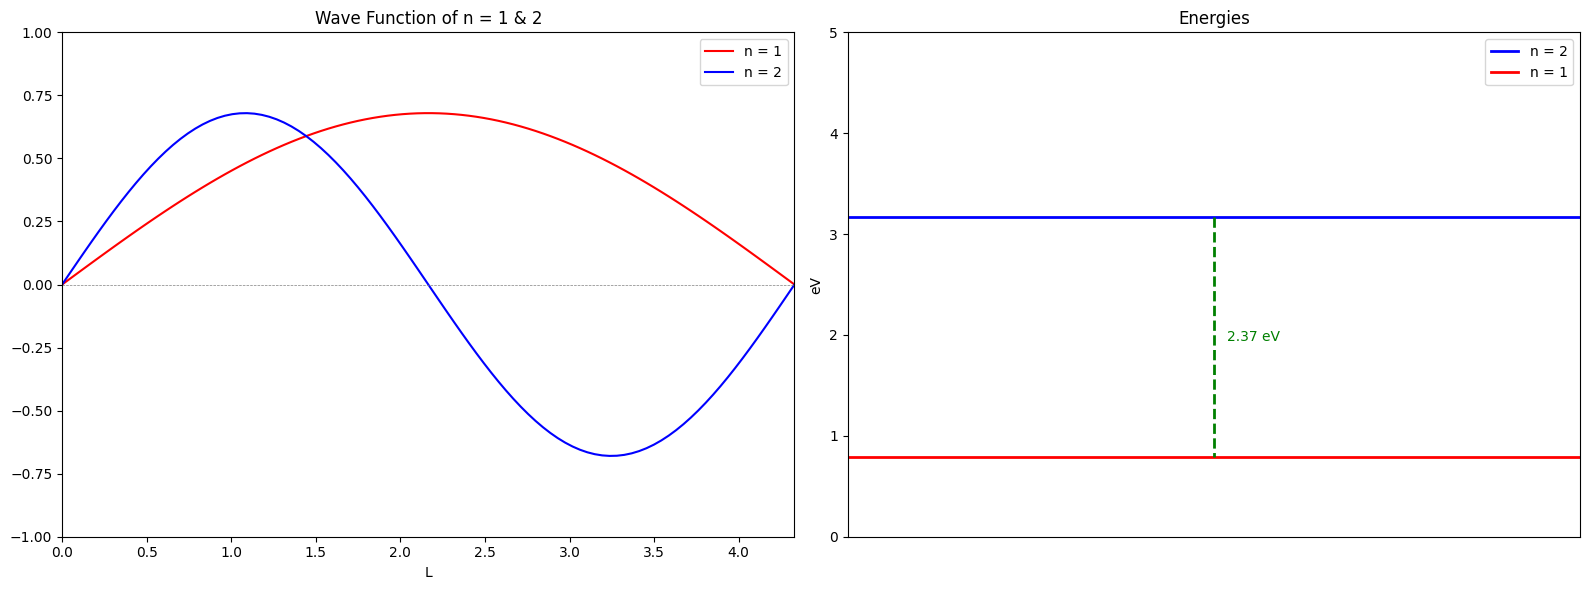

In [ ]:
#@title Plotting Waves and Energies
#@markdown Below are two waves, as we learned earlier changing the wavelength of these waves greatly impacts their energy and in turn color. Change L, taking note of the energy levels of the two waves as well as their energy differences




Length  = 4.33 # @param {type:"slider", min:3.68, max:5.3, step:0.01}

#Plot Wavefunction
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plot_sine_wave(Length, ax=ax1)



#Finding E
L = Length * 10**(-9)
n = 2
h = 6.626 * 10**(-34) #J/s
m = 9.109 * 10**(-31)  #Kg

E_2 = n**2 * np.pi**2 * h**2 / (2 * m *L**2)
n = 1
E_1 = n**2 * np.pi**2 * h**2 / (2 * m *L**2)



#Plot Energies
plot_lines(E_2 * 6.24*10**18, E_1 * 6.24*10**18, ax=ax2)

plt.tight_layout()
plt.show()





# Energy

In [ ]:
#@title Energy of Your Second Excited State

L = Length * 10**(-9)
n = 2
h = 6.626 * 10**(-34) #J/s
m = 9.109 * 10**(-31)  #Kg

E_2 = n**2 * np.pi**2 * h**2 / (2 * m *L**2)
print("Your Second Excited State (n=2) in Electron Volts:")
print(E_2 * 6.24*10**18)

Your Second Excited State (n=2) in Electron Volts:
3.1664358873697696


In [ ]:
#@title Energy of Your First Excited State

n = 1
h = 6.626 * 10**(-34) #J/s
m = 9.109 * 10**(-31)  #Kg

E_1 = n**2 * np.pi**2 * h**2 / (2 * m *L**2)
print("Your First Excited State (n=1) in Electron Volts:")
print(E_1* 6.24*10**18)

Your First Excited State (n=1) in Electron Volts:
0.7916089718424424


In [ ]:

#@title Energy Diffrences
d_E = E_2 - E_1

print("Your Diffrence in the First Two Energy States in Electron Volts")
print( (E_2 - E_1) * 6.24*10**18)


Your Diffrence in the First Two Energy States in Electron Volts
2.3748269155273274


# Color


Energy and light are very closely related! In fact, their relationship can be described by the following equation, $E = \frac{hc}{\lambda}$ where $h$ is Planck's constant ($6.5 \times 10^{-16} \, \text{eV} \cdot \text{s}$), $c$ is the speed of light in a vacuum ($3 \times 10^{8} \, \text{m/s}$), and $\lambda$ is the wavelength of light!


Our eyes have evolved in order to view all wavelengths of light between ~375-800 nm as color!


[Link to more info on light](https://https://healthlighting.com/blogs/lighting-guide/guide-to-the-spectrum-of-light)

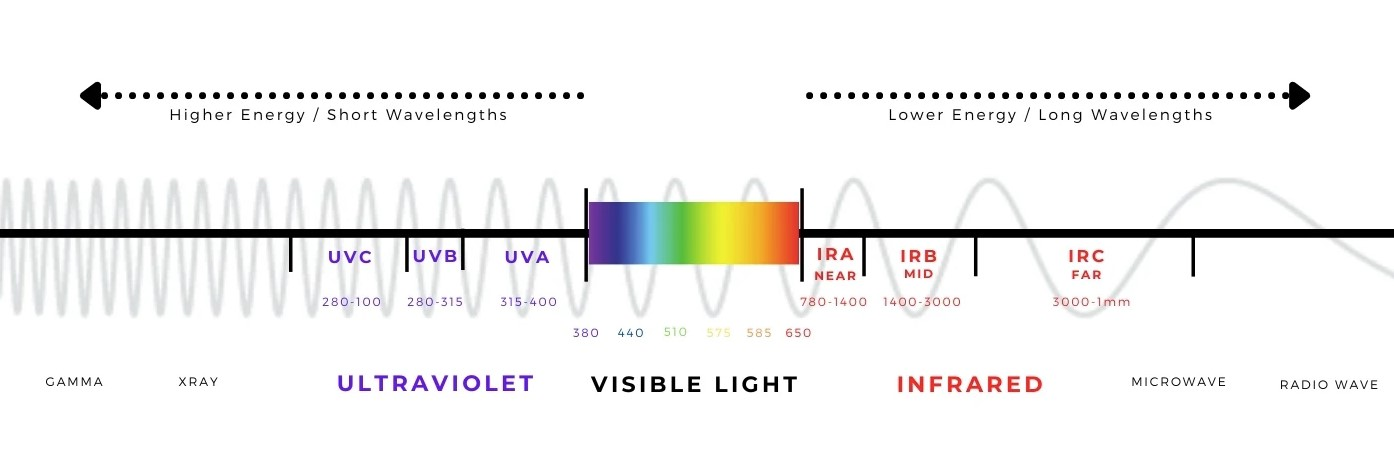

In this scenario, the light that we see is the difference between the two wave energies. Can you calculate what color that would be based on the above energy difference?

In [ ]:
#@title Calculating Wavelength

#E= hc/λ
c = 3 * 10**8
lam = h * c / d_E

print("Wavelength In nanometers: " +  str(lam * 10**9))

Wavelength In nanometers: 522.3063592087399


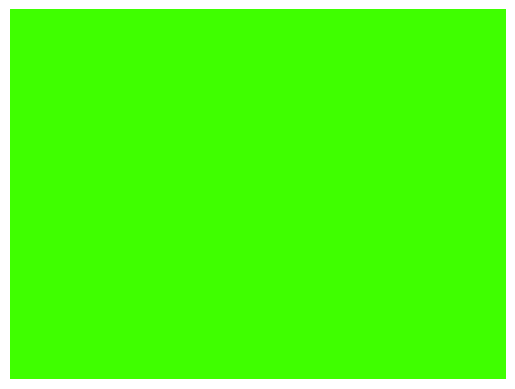

In [ ]:
# @title What Color Is that?

display_color(wavelength_to_rgb(lam * 10**9))

This module was developed as part of grant received from the National Science Foundation, Award Number 1905734.

Copyright 2024-2025, University of Kentucky

Designed by Megan Brown and Nolan Lok